In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [41]:
df1 = pd.read_csv('test_sim_WF_1kbt_gplinear_kl01_pheno_corr.csv')
df2 = pd.read_csv('../localgg/experiments/test_sim_WF_1kbt_gamma0_GQtrain_corrs_pheno_corr.csv')


#sandler_gpatlas_data/workflow_sims/rrBLUP_output/test_sim_WF_1kbt_10000n_5000000_corr_sumary.txt

In [42]:
df1.head(n=6)


,trait_number,pearson_correlation,p_value,true_mean,pred_mean,true_std,pred_std,trait_architecture
0,1,0.583341,0.0,0.039660,0.017451,2.481668,1.147685,1-5
1,2,0.553661,0.0,0.049772,0.074029,2.486171,1.199786,1-5
2,3,0.551710,0.0,-0.001274,0.059459,2.452703,1.179017,1-5
3,4,0.566273,0.0,-0.064866,0.039968,2.529962,1.151091,1-5
4,5,0.557401,0.0,0.013416,0.035574,2.460128,1.181794,1-5
5,6,0.438607,0.0,-0.050722,-0.020416,2.443396,1.008548,6-10


(0.0, 0.6)

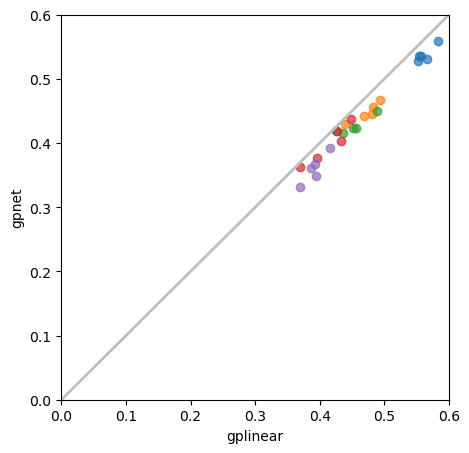

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))

unique_architectures = df1['trait_architecture'].unique()

# Plot each trait_architecture with different colors
for architecture in unique_architectures:
    subset1 = df1[df1['trait_architecture'] == architecture]
    subset2 = df2[df2['trait_architecture'] == architecture]
    ax.scatter(subset1['pearson_correlation'], subset2['pearson_correlation'],
               label=architecture, alpha=0.7)
    ax.axline((1, 1), slope=1, color = 'silver')
    ax.set_xlabel('gplinear')
    ax.set_ylabel('gpnet')




ax.set_xlim(0, 0.6)
ax.set_ylim(0, 0.6)


In [44]:
df3 = pd.read_csv('../../rrBLUP_output/test_sim_WF_1kbt_10000n_5000000bp_scklrr_corr_summary.txt')
df3['trait_group'] = (df3['trait'] - 1) // 5 + 1
df3['trait_architecture'] = df3['trait_group'].apply(lambda x: f"{(x-1)*5 + 1}-{x*5}")

df3.head()

,trait,pearson_corr_pheno,pearson_corr_beta,best_lambda,trait_group,trait_architecture
0,1,0.615770,0.141106,15264.179672,1,1-5
1,2,0.588327,0.143322,15264.179672,1,1-5
2,3,0.607109,0.142140,15264.179672,1,1-5
3,4,0.611950,0.142497,15264.179672,1,1-5
4,5,0.612026,0.142465,15264.179672,1,1-5


(0.0, 0.65)

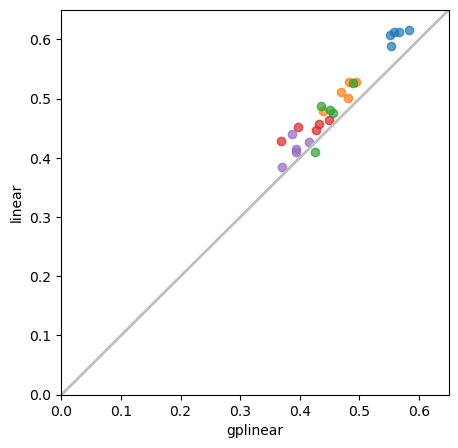

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))

unique_architectures = df1['trait_architecture'].unique()

# Plot each trait_architecture with different colors
for architecture in unique_architectures:
    subset1 = df1[df1['trait_architecture'] == architecture]
    subset2 = df3[df3['trait_architecture'] == architecture]
    ax.scatter(subset1['pearson_correlation'], subset2['pearson_corr_pheno'],
               label=architecture, alpha=0.7)
    ax.axline((1, 1), slope=1, color = 'silver')
    ax.set_xlabel('gplinear')
    ax.set_ylabel('linear')




ax.set_xlim(0, 0.65)
ax.set_ylim(0, 0.65)